In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# Load Dataset
df = pd.read_csv(r"EV_Data.csv")


In [50]:
df.head()

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,NaN,Single,Graduate,5,1.193876e+06,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,NaN,Single,Graduate,4,1.844540e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,NaN,Single,Graduate,4,2.948150e+06,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2.832380e+06,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,NaN,Single,Graduate,4,2.638751e+06,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [51]:
df.info

<bound method DataFrame.info of      Unnamed: 0  Age       City Profession Marital Status      Education  \
0             0   30      Nabha        NaN         Single       Graduate   
1             1   27       Pune        NaN         Single       Graduate   
2             2   32  Kashipur         NaN         Single       Graduate   
3             3   55       Pune   Business         Single       Graduate   
4             4   26     Satara        NaN         Single       Graduate   
..          ...  ...        ...        ...            ...            ...   
995         995   31       Pune        NaN        Married       Graduate   
996         996   29       Pune        NaN        Married  Post Graduate   
997         997   30     Mumbai   Business         Single       Graduate   
998         998   24  Ahmedabad        NaN        Married       Graduate   
999         999   30       Pune   Business         Single       Graduate   

     No. of Family members  Annual Income  \
0         

In [52]:
df.shape

(1000, 15)

In [53]:
print(df.columns)

Index(['Unnamed: 0', 'Age', 'City', 'Profession', 'Marital Status',
       'Education', 'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')


In [82]:
df.describe()

,Unnamed: 0,Age,No. of Family members,Annual Income,Preference for wheels in EV
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,499.500000,31.800000,4.118000,2.258342e+06,3.349000
std,288.819436,11.294847,1.469774,9.993558e+05,0.887686
min,0.000000,15.000000,0.000000,-3.761509e+05,2.000000
25%,249.750000,26.000000,4.000000,1.782116e+06,2.000000
50%,499.500000,29.000000,4.000000,2.329246e+06,4.000000
75%,749.250000,31.000000,5.000000,2.753170e+06,4.000000
max,999.000000,118.000000,8.000000,1.282128e+07,4.000000


In [54]:
df.isnull().sum()

Unnamed: 0                                                                0
Age                                                                       0
City                                                                      0
Profession                                                              460
Marital Status                                                            0
Education                                                                 0
No. of Family members                                                     0
Annual Income                                                             0
Would you prefer replacing all your vehicles to Electronic vehicles?      0
If Yes/Maybe what type of  EV would you prefer?                           0
Do you think Electronic Vehicles are economical?                          0
Which brand of vehicle do you currently own?                              0
How much money could you spend on an Electronic vehicle?                  0
Preference f

C:\Users\manju\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


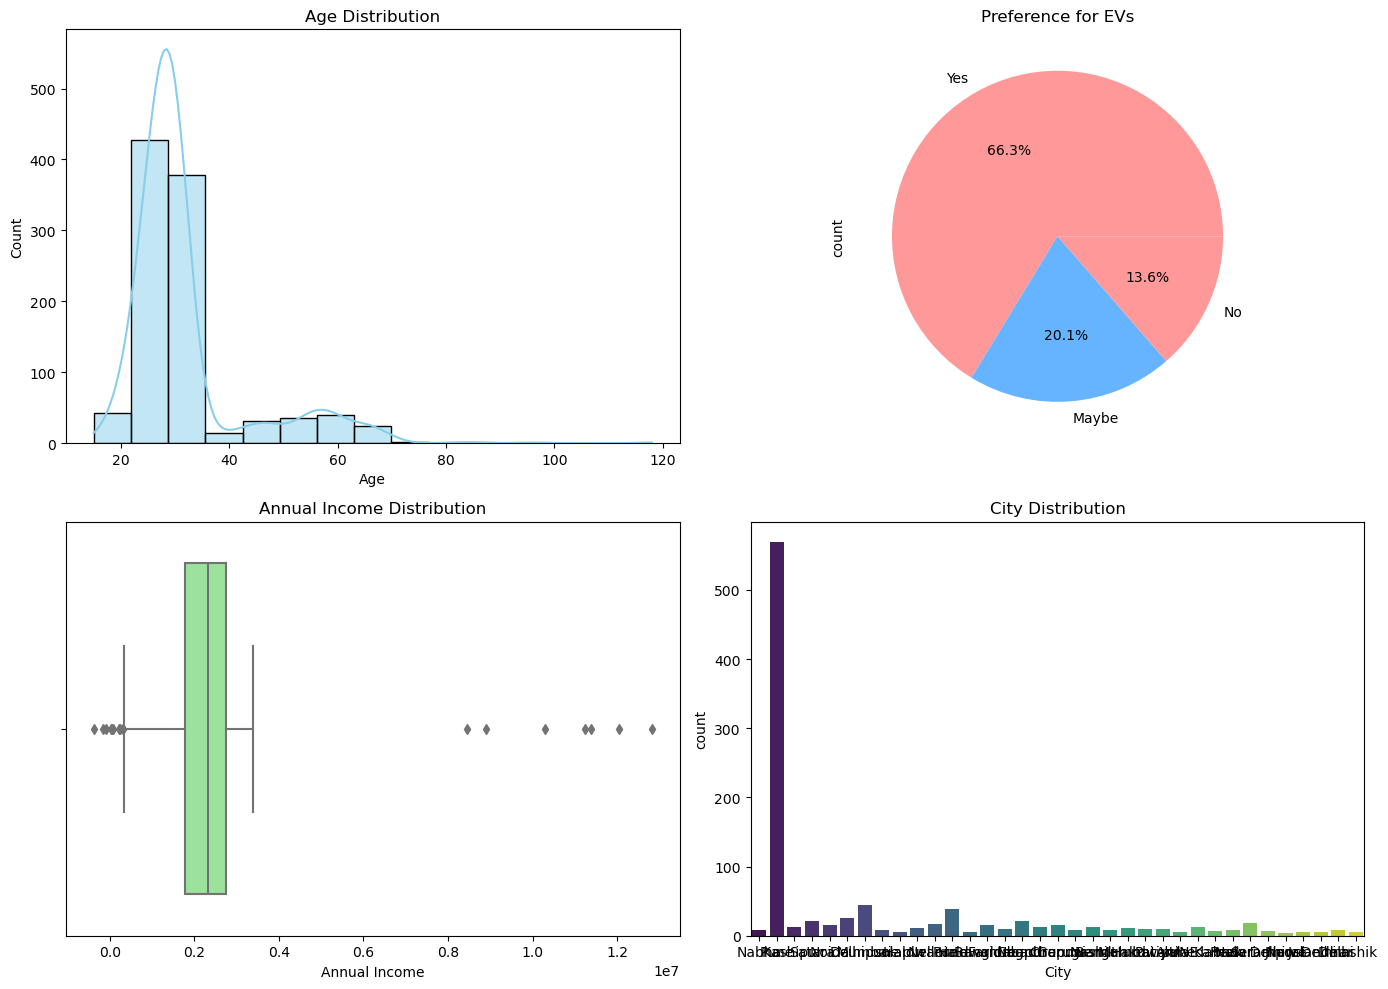

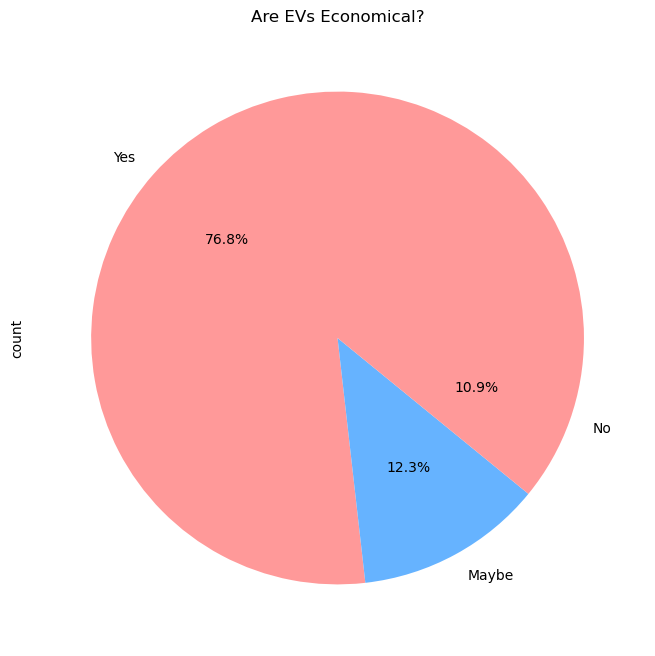

In [55]:
# Set up the figure size
plt.figure(figsize=(14, 10))

# 1. Age Distribution - Histogram with KDE
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, bins=15, color='skyblue')
plt.title('Age Distribution')

# 2. Preference for Replacing Vehicles with EV - Pie Chart
plt.subplot(2, 2, 2)
df['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Preference for EVs')

# 3. Annual Income - Box Plot
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Annual Income'], color='lightgreen')
plt.title('Annual Income Distribution')

# 4. City Distribution - Bar Chart
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='City', palette='viridis')
plt.title('City Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

# 5. Are EVs Economical? - Pie Chart (separate)
plt.figure(figsize=(8, 8))
df['Do you think Electronic Vehicles are economical?'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Are EVs Economical?')
plt.show()

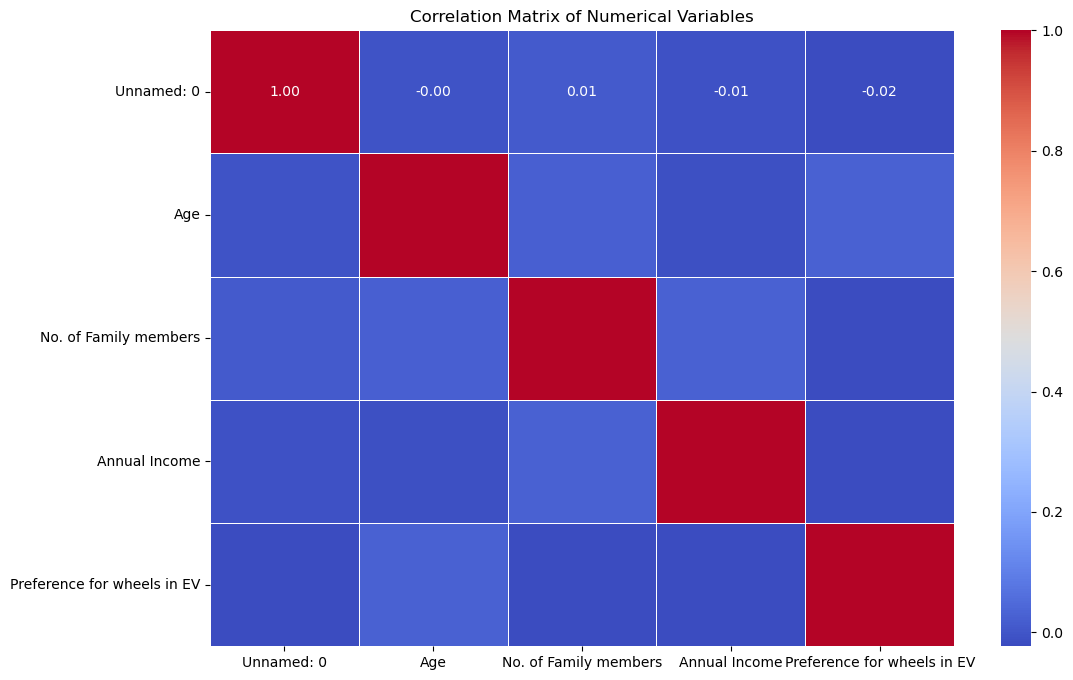

In [56]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title for the heatmap
plt.title('Correlation Matrix of Numerical Variables')

# Show the plot
plt.show()


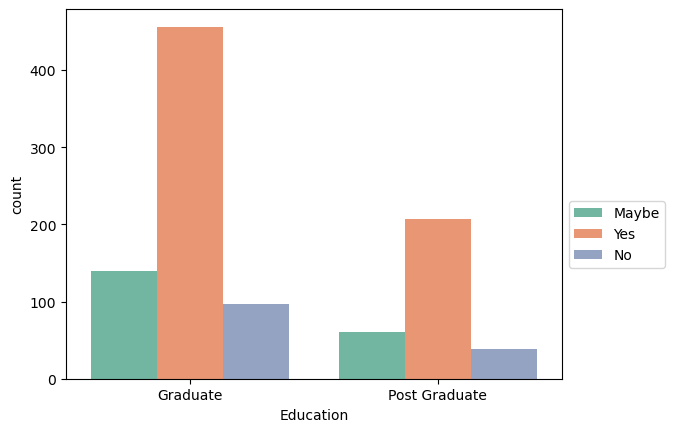

In [57]:
sns.countplot(x ='Education', hue = 'Would you prefer replacing all your vehicles to Electronic vehicles?',  data = df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [58]:
df.describe()


,Unnamed: 0,Age,No. of Family members,Annual Income,Preference for wheels in EV
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,499.500000,31.800000,4.118000,2.258342e+06,3.349000
std,288.819436,11.294847,1.469774,9.993558e+05,0.887686
min,0.000000,15.000000,0.000000,-3.761509e+05,2.000000
25%,249.750000,26.000000,4.000000,1.782116e+06,2.000000
50%,499.500000,29.000000,4.000000,2.329246e+06,4.000000
75%,749.250000,31.000000,5.000000,2.753170e+06,4.000000
max,999.000000,118.000000,8.000000,1.282128e+07,4.000000


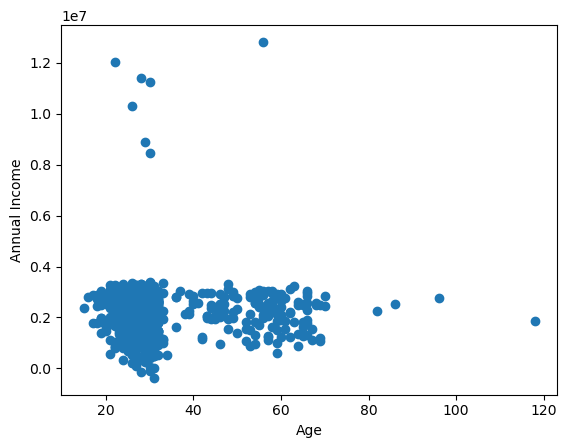

In [59]:
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.scatter(df['Age'],df['Annual Income'])

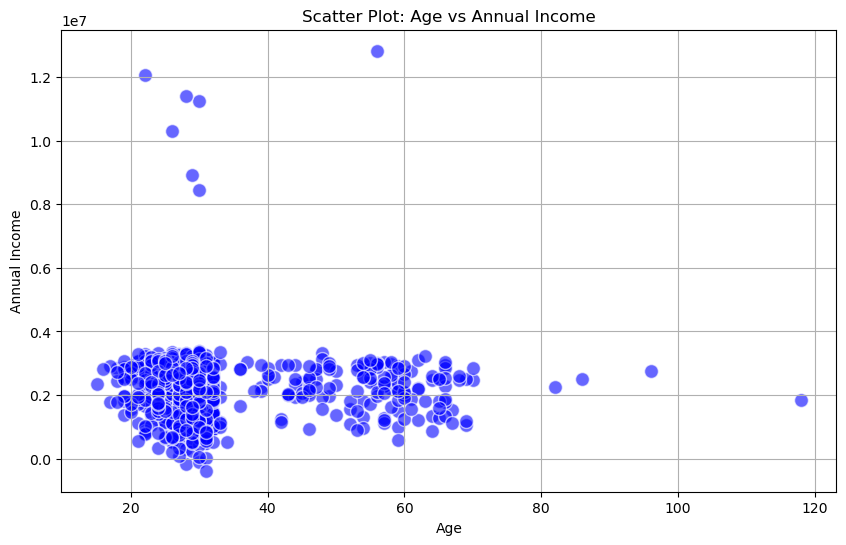

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Annual Income'], c='blue', alpha=0.6, edgecolors='w', s=100)
plt.title('Scatter Plot: Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()

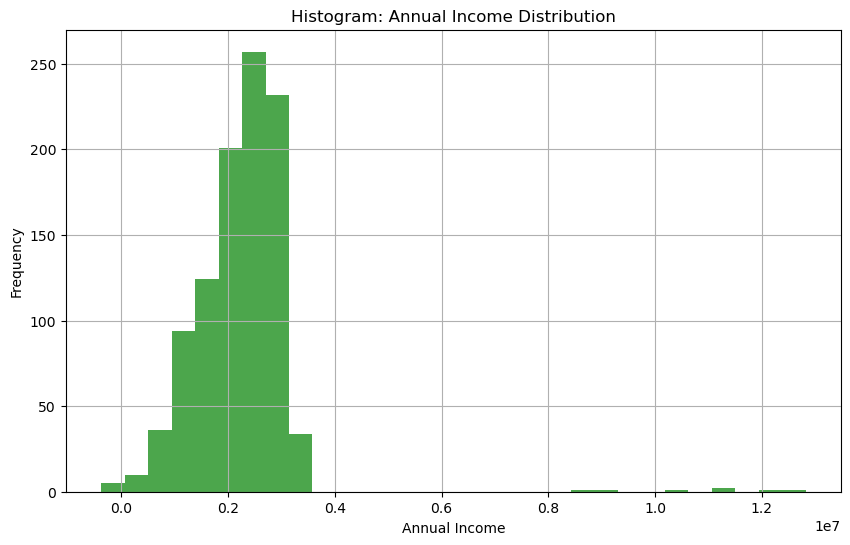

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(df['Annual Income'], bins=30, color='green', alpha=0.7)
plt.title('Histogram: Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


C:\Users\manju\anaconda3\New folder\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


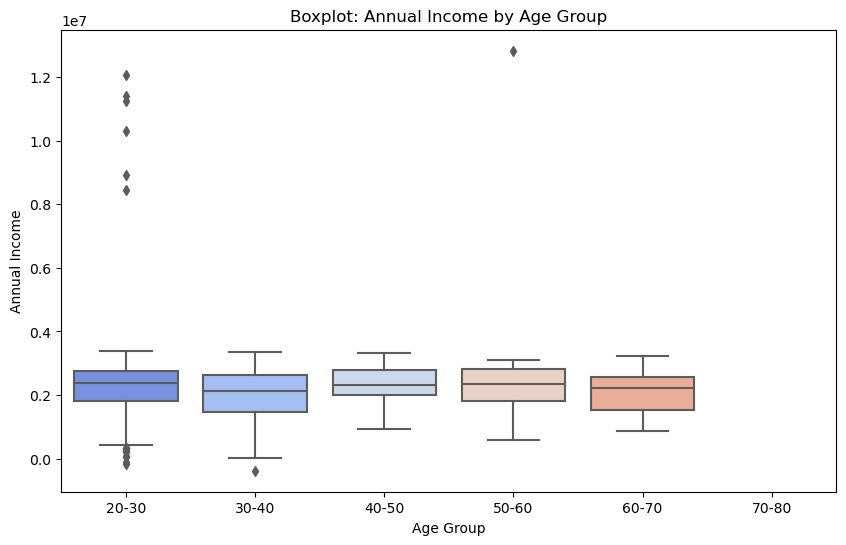

In [73]:
df['Age Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Annual Income', data=df, palette='coolwarm')
plt.title('Boxplot: Annual Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Annual Income')
plt.show()


C:\Users\manju\AppData\Local\Temp\ipykernel_21012\2195706762.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = data.groupby('Age Group')['Annual Income'].mean().reset_index()
C:\Users\manju\anaconda3\New folder\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


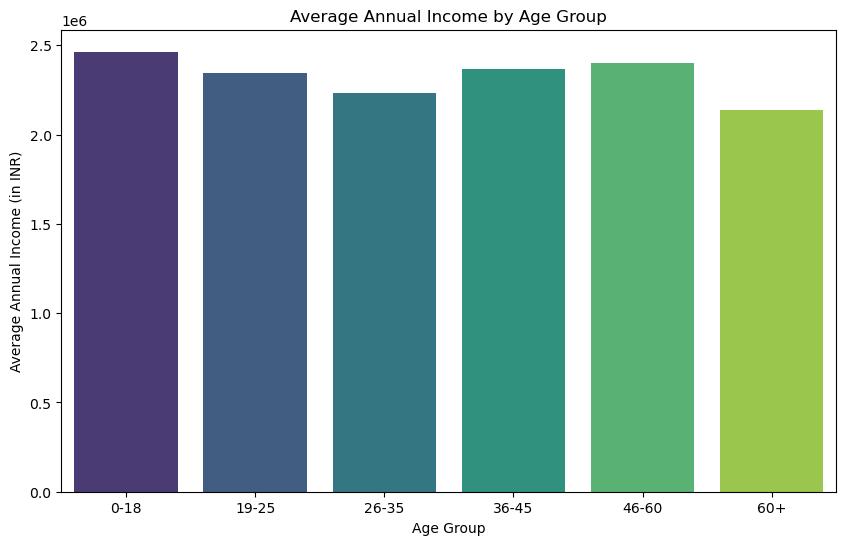

In [81]:
# Preprocessing: Select relevant columns
data = df[['Age', 'Annual Income']].dropna()

# Create age groups
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-60', '60+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate the average annual income
age_group_summary = data.groupby('Age Group')['Annual Income'].mean().reset_index()

# Visualize annual income by age group using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Annual Income', data=age_group_summary, palette='viridis')
plt.title('Average Annual Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Annual Income (in INR)')
plt.show()


C:\Users\manju\AppData\Local\Temp\ipykernel_21012\250918793.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = data.groupby('Age Group')['Spending'].mean().reset_index()
C:\Users\manju\anaconda3\New folder\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


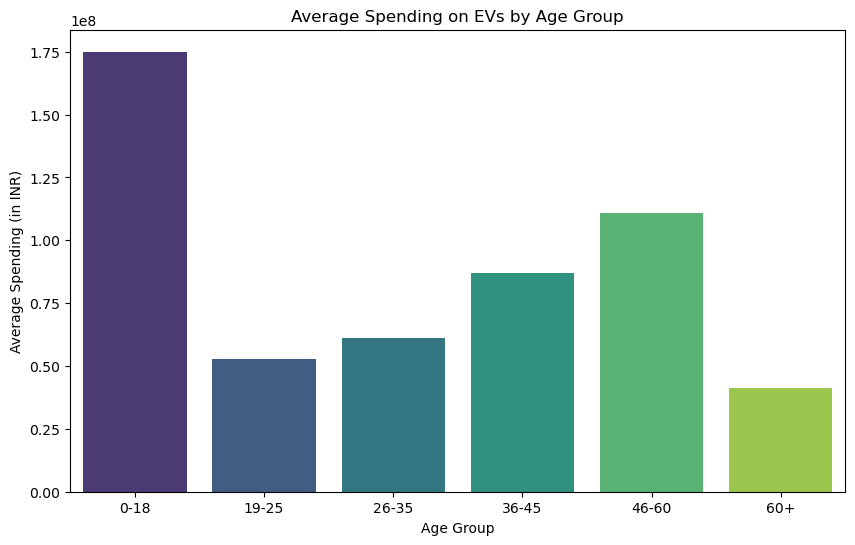

In [78]:
# Preprocessing: Select relevant columns
data = df[['Age', 'How much money could you spend on an Electronic vehicle?']].dropna()

# Rename the columns for convenience
data.columns = ['Age', 'Spending']

# Function to clean the 'Spending' column
def clean_spending(value):
    if isinstance(value, str):
        # Extract numeric values using regex
        numbers = re.findall(r'\d+', value)
        if numbers:
            return int(numbers[0]) * 1000  # Assuming values are in thousands
        else:
            return None
    return value

# Apply the cleaning function
data['Spending'] = data['Spending'].apply(clean_spending)

# Drop rows with missing or invalid spending data
data = data.dropna(subset=['Spending'])

# Create age groups
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-60', '60+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate the average spending
age_group_summary = data.groupby('Age Group')['Spending'].mean().reset_index()

# Visualize spending by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Spending', data=age_group_summary, palette='viridis')
plt.title('Average Spending on EVs by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending (in INR)')
plt.show()


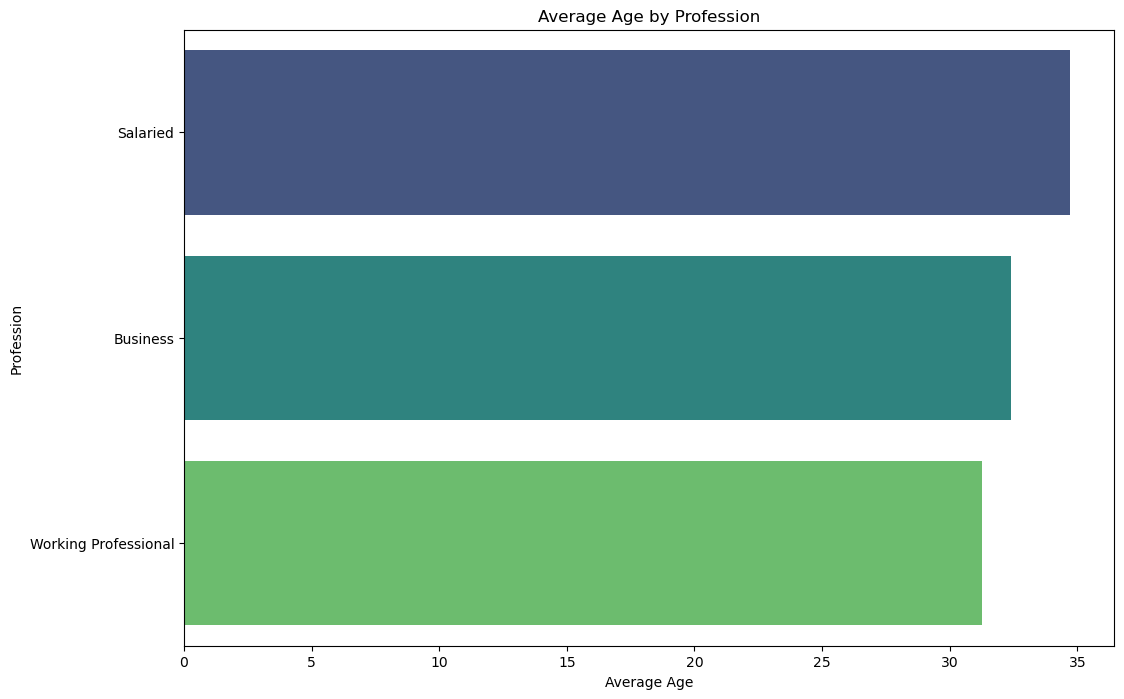

In [79]:
i# Preprocessing: Select relevant columns
data = df[['Age', 'Profession']].dropna()

# Group by profession and calculate the average age
profession_summary = data.groupby('Profession')['Age'].mean().reset_index()

# Sort the data by average age for better visualization
profession_summary = profession_summary.sort_values(by='Age', ascending=False)

# Visualize average age by profession
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='Profession', data=profession_summary, palette='viridis')
plt.title('Average Age by Profession')
plt.xlabel('Average Age')
plt.ylabel('Profession')
plt.show()


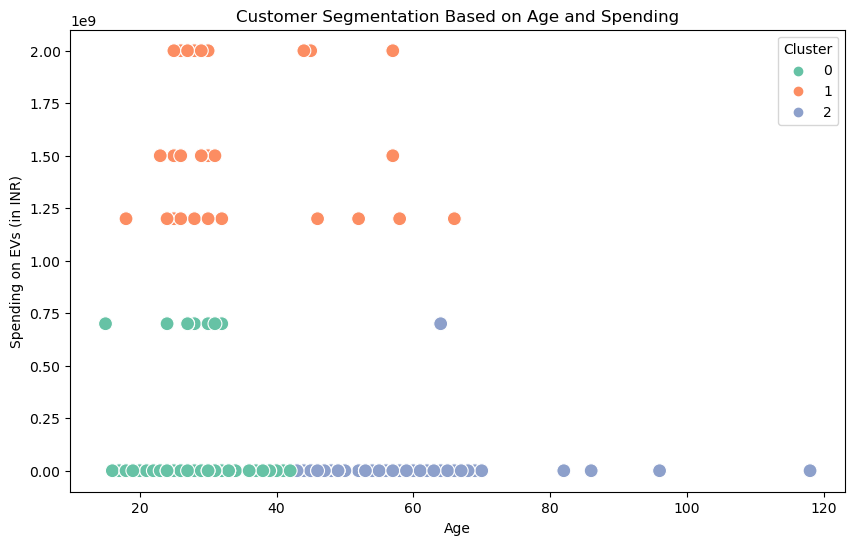

In [61]:
# Clustering: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Spending']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Age'], 
    y=data['Spending'], 
    hue=data['Cluster'], 
    palette='Set2', 
    s=100
)
plt.title('Customer Segmentation Based on Age and Spending')
plt.xlabel('Age')
plt.ylabel('Spending on EVs (in INR)')
plt.legend(title='Cluster')
plt.show()

C:\Users\manju\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


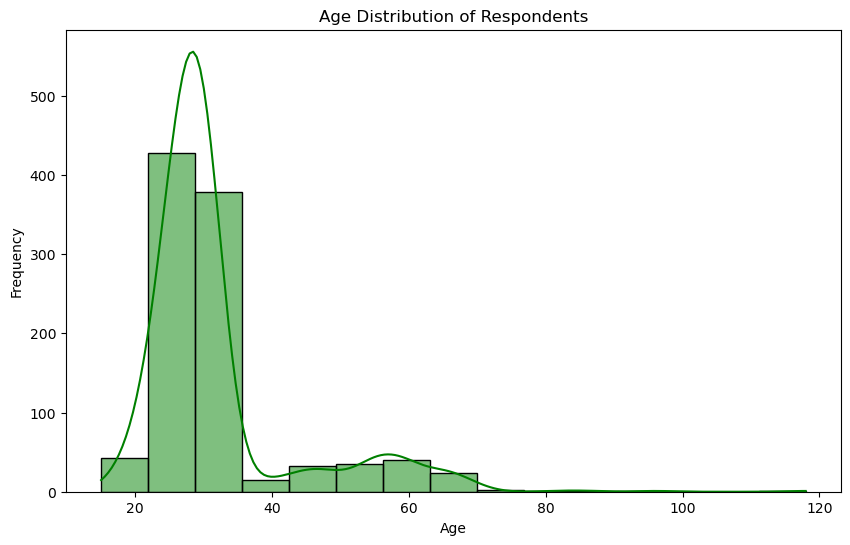

In [62]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=15, color='green')
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

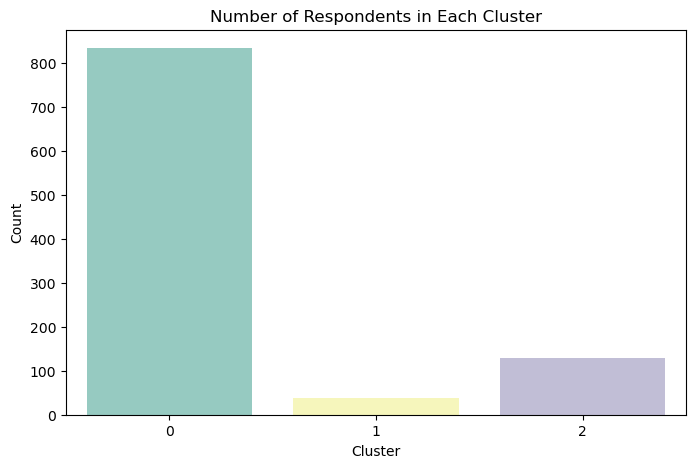

In [63]:
# Count Plot of Clusters
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=data, palette='Set3')
plt.title('Number of Respondents in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

C:\Users\manju\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manju\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


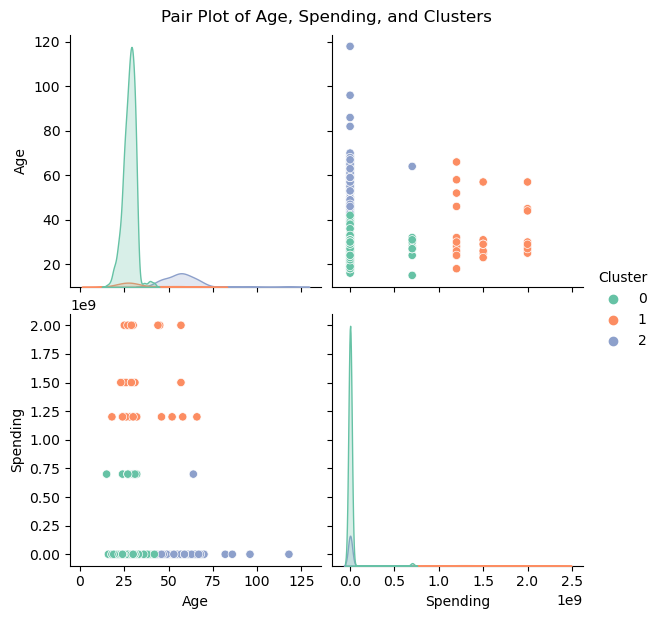

In [64]:
# Pair Plot: Visualize Age, Spending, and Cluster Relationships
sns.pairplot(
    data, 
    vars=['Age', 'Spending'], 
    hue='Cluster', 
    palette='Set2', 
    diag_kind='kde', 
    height=3
)
plt.suptitle('Pair Plot of Age, Spending, and Clusters', y=1.02)
plt.show()

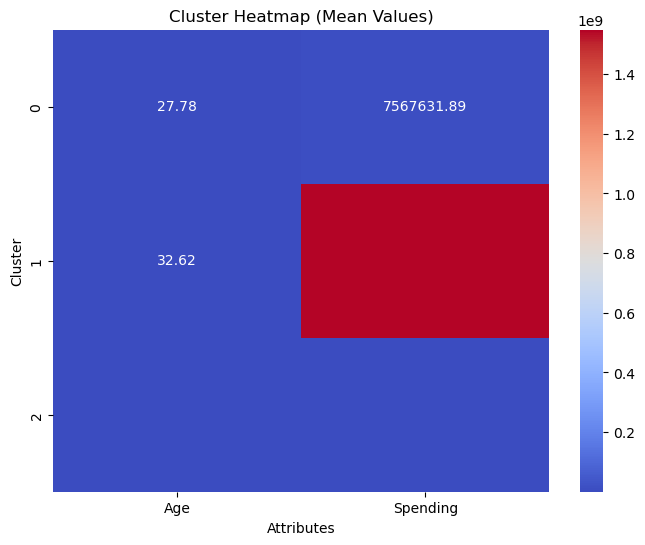

In [65]:
# Cluster Heatmap: Mean Values of Attributes by Cluster
cluster_summary = data.groupby('Cluster')[['Age', 'Spending']].mean()
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Cluster Heatmap (Mean Values)')
plt.xlabel('Attributes')
plt.ylabel('Cluster')
plt.show()

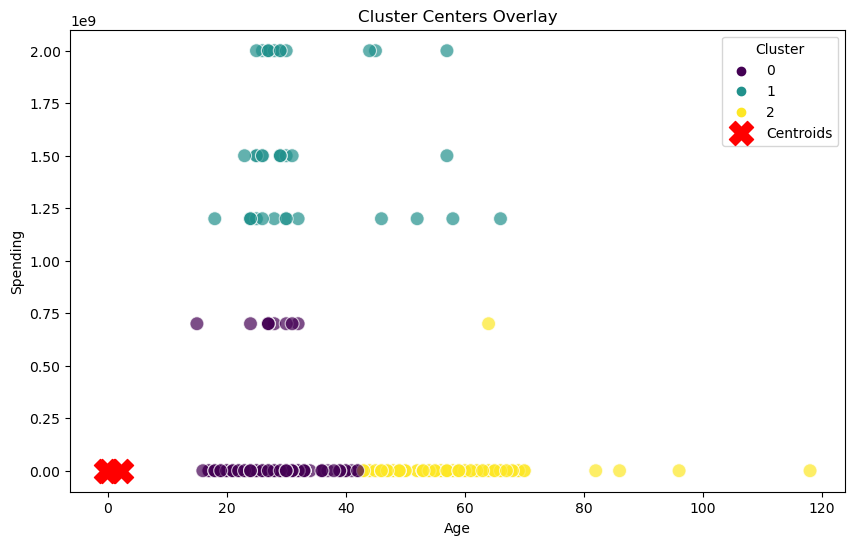

In [69]:
# Cluster Centers Overlay
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age', 
    y='Spending', 
    hue='Cluster', 
    palette='viridis', 
    data=data, 
    s=100, 
    alpha=0.7
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s=300, 
    c='red', 
    label='Centroids', 
    marker='X'
)
plt.title('Cluster Centers Overlay')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.legend(title='Cluster', loc='upper right')
plt.show()

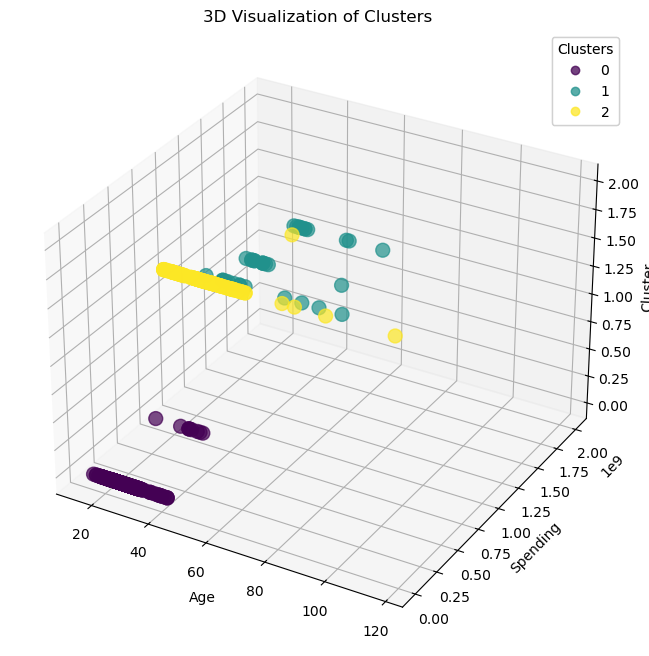

In [67]:
# 3D Visualization of Clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data['Age'], 
    data['Spending'], 
    data['Cluster'], 
    c=data['Cluster'], 
    cmap='viridis', 
    s=100, 
    alpha=0.7
)
ax.set_title('3D Visualization of Clusters')
ax.set_xlabel('Age')
ax.set_ylabel('Spending')
ax.set_zlabel('Cluster')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()


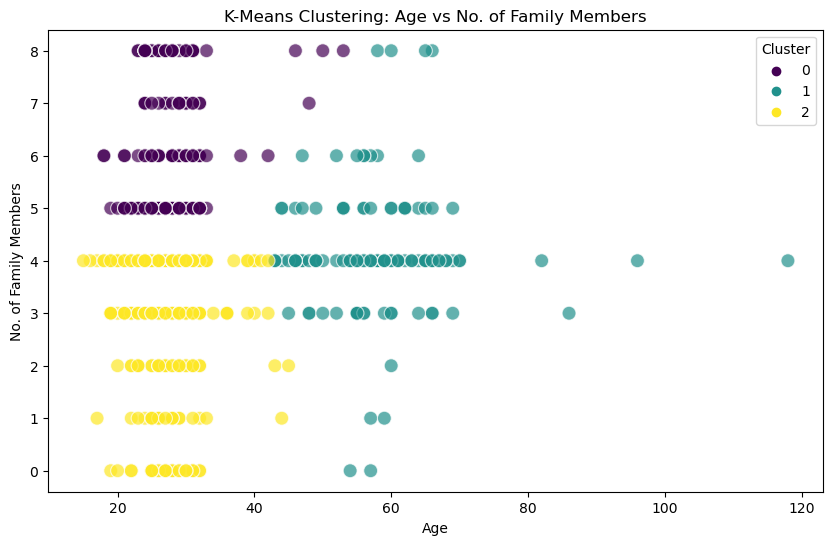

Cluster Centers (scaled):
[[-0.33254502  1.17616562]
 [ 2.30581201  0.00869223]
 [-0.34911866 -0.44985673]]

Cluster Summary:
               Age  No. of Family members
Cluster                                  
0        28.045833               5.845833
1        57.830769               4.130769
2        27.858730               3.457143


In [90]:

data = df[['Age', 'No. of Family members']].dropna()

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Age'], 
    y=data['No. of Family members'], 
    hue=data['Cluster'], 
    palette='viridis', 
    s=100, 
    alpha=0.7
)
plt.title('K-Means Clustering: Age vs No. of Family Members')
plt.xlabel('Age')
plt.ylabel('No. of Family Members')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Cluster Centers
print("Cluster Centers (scaled):")
print(kmeans.cluster_centers_)

# Analyze the clusters
cluster_summary = data.groupby('Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)


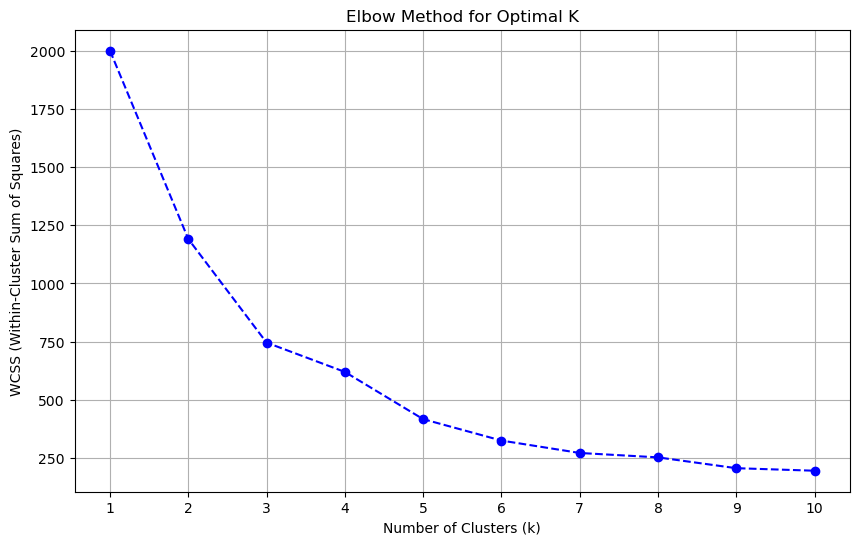

In [89]:

data = df[['Age', 'No. of Family members']].dropna()

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Calculate WCSS for different cluster counts
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid(True)
plt.show()
